In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
print(df.shape)
df.head()

(77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df.loan_status

# Separate the X variable, the features
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']
X = df[features]

In [5]:
# Review the y variable Series
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [6]:
# Review the X variable DataFrame
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 4.1 MB


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

C:\Users\mptic\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
preds = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

Confusion Matrix: 
 [[18655   110]
 [   36   583]]


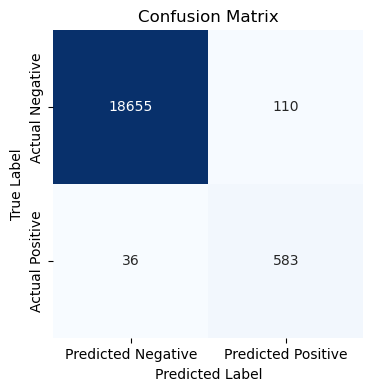

In [10]:
# Generate a confusion matrix for the model
cf = confusion_matrix(y_test, preds)

print(f"Confusion Matrix: \n {cf}")

plt.figure(figsize=(4, 4))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [11]:
# Print the classification report for the model
cr = classification_report(y_test, preds)

print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [12]:
# Let's take it a step further and evaluate additional metrics from our model on the testing data
r2 = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mse)

test_results = f"""TEST METRICS
R2: {r2}
MSE: {mse}
RMSE: {rmse}
MAE: {mae}
"""
print(test_results)

TEST METRICS
R2: 0.7563552604335487
MSE: 0.007531985142385473
RMSE: 0.08678701021688369
MAE: 0.007531985142385473



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model shows strong predictive value for both target values. Our classification report for value 0 shows a recall of 0.99, indicating that nearly all predictions for loan_status=0 (healthy loan) were actually a value of 0, with very few false negatives.

Our report shows a weaker predictive value for loan_status=1 (high-risk loan), although it is still very strong with a high precision (accuracy of true positive values) and a very high recall.

When looking at the additional metrics provided (R², MSE, RMSE, and MAE), we have further evidence of a good fit for our model.

- **R²** indicates a high percentage of variance in the target data is explained by our model.
- **Mean Squared Error (MSE)** measures the average squared differences between predicted and actual values. The low score of 0.0075 indicates our model is fairly accurate.
- **Root Mean Squared Error (RMSE)** provides the error in the same units as the target. A low RMSE indicates a low error score.
- **Mean Absolute Error (MAE)** shows the average magnitude of errors, and its low value further supports a strong model.

---